In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib

Using TensorFlow backend.


Test MSE: 0.078


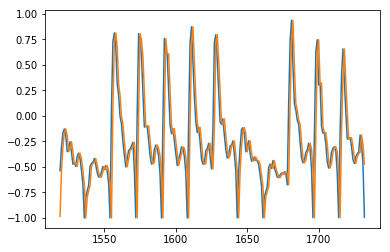

In [515]:
#Create a base model to measure performance (naive model)

dataset = read_csv("dataset-1.csv")
dataset_ = dataset[["time", "na_entry"]]

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(dataset_)
dataset_scaled = scaler.transform(dataset_)
data_naive = pd.DataFrame(dataset_scaled)

data_frame = concat([data_naive.shift(1), data_naive], axis=1)
data_frame.columns = ['t1', 't2', "na1", "na2"]
dataframe = data_frame[["t2","na2"]]

# split into train and test sets
X = dataframe.values
train_size = 1520
val_size = 1620
train, validation, test = X[1:train_size], X[train_size:val_size], X[val_size:]
train_X, train_y = train[:,0], train[:,1]
val_X, val_y = validation[:,0], validation[:,1]
test_X, test_y = test[:,0], test[:,1]

# Naive Model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [508]:
train_X.shape

(1499,)

In [510]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.layers import Dropout
import keras

dataset = read_csv("dataset-1.csv")
dataset=dataset[["na_entry", "time", "weekday", "holiday", "days"]]


dataset["na_entry_lag"]=dataset["na_entry"].shift(1)
dataset = dataset[1:]

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(dataset)
dataset_scaled = scaler.transform(dataset)

train_size = 1520
val_size = 1620
train, validation, test = dataset_scaled[1:train_size], dataset_scaled[train_size:val_size], dataset_scaled[val_size:]
train_X, train_y = train[:,1:], train[:,0]
val_X, val_y = validation[:,1:], validation[:,0]
test_X, test_y = test[:,1:], test[:,0]

#inverse scale
#scaler.inverse_transform(dataset_scaled)

def fit_model(train_X, train_y, test_X, test_y, epochs):
    model = Sequential()
    model.add(Dense(6, activation='relu', input_dim=train_X.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    adam = keras.optimizers.Adam(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.005, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer= adam, metrics=['mse'])
    history = model.fit(train_X, train_y, epochs=epochs, 
              batch_size=32, validation_data=(test_X, test_y), 
              verbose=2, shuffle=True)
    
    return model, history


final_model, history = fit_model(train_X, train_y, val_X, val_y, 2500)

results = final_model.predict(val_X)
print(mean_squared_error(val_y, results))

Train on 1519 samples, validate on 100 samples
Epoch 1/2500
 - 1s - loss: 0.1354 - mean_squared_error: 0.1354 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 2/2500
 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 3/2500
 - 0s - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 4/2500
 - 0s - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 5/2500
 - 0s - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 6/2500
 - 0s - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 7/2500
 - 0s - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 8/2500
 - 0s - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 9/2500
 - 0s - loss: 0.0540

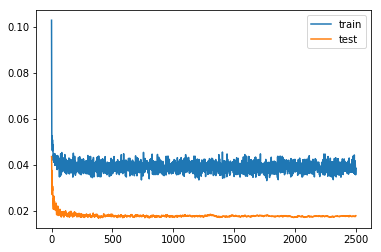

In [482]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [511]:
final_model.predict(np.expand_dims(test_X[0], axis=0))

array([[-0.11899672]], dtype=float32)

In [512]:
stored_results = final_model.predict(test_X)

In [513]:
mean_squared_error(test_y, stored_results)

0.014835333108103789

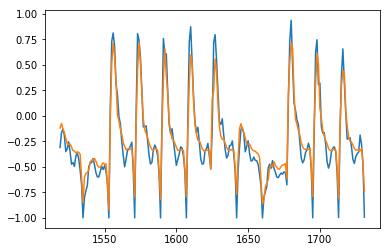

In [514]:
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in stored_results])
plt.show()

In [285]:

inputs = test_X[:,:-1][4]
X_input = test_X[:,4:][0]
preds = list()

In [286]:
preds.append(X_input)

In [288]:
preds[0]

array([-0.55055732])

In [284]:
np.append(inputs, X_input)

array([ 0.44444444,  1.        , -1.        ,  0.66666667, -0.55055732])

In [493]:

inputs = test_X[:,:-1]
X_input = test_X[:,4:][0]

def predict_multi_step(model, X, inputs):
    predicts = list()
    predicts.append(X)
    
    for i in range(len(inputs)):
        test = np.append(inputs[i], predicts[i])
        forecast_val = model.predict(np.expand_dims(test, axis=0))
        predicts.append(forecast_val)
        
    return predicts[1:]
        


In [494]:
predictions = predict_multi_step(final_model, X_input, inputs)

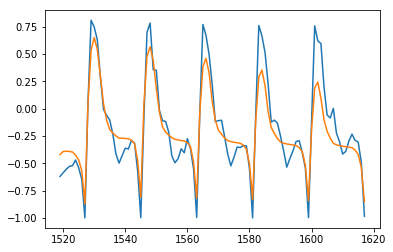

In [495]:
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [313]:
test_y[:7]

array([-0.62062102, -0.58698248, -0.55493631, -0.52886146, -0.52249204,
       -0.47014331, -0.5406051 ])

In [220]:
import numpy as np
g=[[1,0,1,0,1,1]]
gg=[[0.7,0.5,0.91,0.97,0.96,0.3]]
g=np.asarray(g)
gg=np.asarray(gg)

In [23]:
def fit_model(train_X, train_y, test_X, test_y, epochs):
    model = Sequential()
    model.add(Dense(3, activation='relu', input_dim=train_X.shape[1]))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['accuracy'])
    model.fit(train_X, train_y, epochs=epochs, 
              batch_size=20, validation_data=(test_X, test_y), 
              verbose=2, shuffle=False)
    
    return model


final_model = fit_model(train_X, train_y, test_X, test_y, 200)


5

In [19]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

array([[-0.86285828, -0.77777778,  1.        ,  1.        , -1.        ,
        -0.91679936],
       [-0.81568471, -0.66666667,  1.        ,  1.        , -1.        ,
        -0.86285828],
       [-0.7446258 , -0.55555556,  1.        ,  1.        , -1.        ,
        -0.81568471],
       ...,
       [-0.30692675,  0.66666667,  0.33333333, -1.        ,  1.        ,
        -0.2906051 ],
       [-0.49283439,  0.77777778,  0.33333333, -1.        ,  1.        ,
        -0.30692675],
       [-0.98507166,  0.88888889,  0.33333333, -1.        ,  1.        ,
        -0.49283439]])

In [ ]:
cut = 1500
train, test = dataset_scaled[1:cut], X[cut:]
train_X, train_y = train[:,1:], train[:,0]
test_X, test_y = test[:,1:], test[:,0]

def model_mlp(neurons=1, dropout_rate=0.0):
    
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=train_X.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['accuracy'])
    return model 

model = KerasClassifier(build_fn=model_mlp, verbose=0)

batch_size = [10, 20]
epochs = [10, 20]
neurons = [1, 5, 10]
optimizer = ['Adadelta', 'Adam']
weight_constraint = [1, 2]
dropout_rate = [0.0, 0.1]

param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons,
                 dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(train_X, train_y)


In [27]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.010007 using {'epochs': 10, 'dropout_rate': 0.1, 'batch_size': 20, 'neurons': 1}
0.002001 (0.001634) with: {'epochs': 10, 'dropout_rate': 0.0, 'batch_size': 10, 'neurons': 1}
0.002001 (0.001633) with: {'epochs': 10, 'dropout_rate': 0.0, 'batch_size': 10, 'neurons': 5}
0.000000 (0.000000) with: {'epochs': 10, 'dropout_rate': 0.0, 'batch_size': 10, 'neurons': 10}
0.001334 (0.001886) with: {'epochs': 20, 'dropout_rate': 0.0, 'batch_size': 10, 'neurons': 1}
0.000000 (0.000000) with: {'epochs': 20, 'dropout_rate': 0.0, 'batch_size': 10, 'neurons': 5}
0.000000 (0.000000) with: {'epochs': 20, 'dropout_rate': 0.0, 'batch_size': 10, 'neurons': 10}
0.004003 (0.001638) with: {'epochs': 10, 'dropout_rate': 0.1, 'batch_size': 10, 'neurons': 1}
0.002668 (0.001885) with: {'epochs': 10, 'dropout_rate': 0.1, 'batch_size': 10, 'neurons': 5}
0.000000 (0.000000) with: {'epochs': 10, 'dropout_rate': 0.1, 'batch_size': 10, 'neurons': 10}
0.002668 (0.001885) with: {'epochs': 20, 'dropout_rate': 0.1, 

In [90]:
train_X.shape[1]

4

In [81]:
dataset_scaled[:,0]

array([-0.91679936, -0.86285828, -0.81568471, ..., -0.2906051 ,
       -0.30692675, -0.49283439])

In [94]:
# fit an MLP network to training data
def fit_model(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	model = Sequential()
	model.add(Dense(neurons, activation='relu', input_dim=X.shape[1]))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=0, shuffle=False)
	return model


def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

len(df.columns)

NameError: name 'df' is not defined

In [63]:

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

array([[4.180e+02, 7.000e+00, 6.000e+00, 1.000e+00, 1.000e+00],
       [6.890e+02, 8.000e+00, 6.000e+00, 1.000e+00, 1.000e+00],
       [9.260e+02, 9.000e+00, 6.000e+00, 1.000e+00, 1.000e+00],
       ...,
       [3.564e+03, 2.000e+01, 4.000e+00, 0.000e+00, 3.100e+01],
       [3.482e+03, 2.100e+01, 4.000e+00, 0.000e+00, 3.100e+01],
       [2.548e+03, 2.200e+01, 4.000e+00, 0.000e+00, 3.100e+01]])

In [10]:
#MLP model

'''
We will use a base MLP model with 1 neuron hidden layer, a rectified linear activation function on hidden neurons, and linear activation function on output neurons.

A batch size of 4 is used where possible, with the training data truncated to ensure the number of patterns is divisible by 4. In some cases a batch size of 2 is used.

Normally, the training dataset is shuffled after each batch or each epoch, which can aid in fitting the training dataset on classification and regression problems. Shuffling was turned off for all experiments as it seemed to result in better performance. More studies are needed to confirm this result for time series forecasting.

The model will be fit using the efficient ADAM optimization algorithm and the mean squared error loss function.
'''

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib


from matplotlib import pyplot
import numpy
 
    
    
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 

 

 

 
# run a repeated experiment
def experiment(repeats, series, epochs, lag, neurons):
	# transform data to be stationary
	raw_values = series.values
	diff_values = difference(raw_values, 1)
	# transform data to be supervised learning
	supervised = timeseries_to_supervised(diff_values, lag)
	supervised_values = supervised.values[lag:,:]
	# split data into train and test-sets
	train, test = supervised_values[0:-12], supervised_values[-12:]
	# transform the scale of the data
	scaler, train_scaled, test_scaled = scale(train, test)
	# run experiment
	error_scores = list()
	for r in range(repeats):
		# fit the model
		batch_size = 4
		train_trimmed = train_scaled[2:, :]
		model = fit_model(train_trimmed, batch_size, epochs, neurons)
		# forecast test dataset
		test_reshaped = test_scaled[:,0:-1]
		output = model.predict(test_reshaped, batch_size=batch_size)
		predictions = list()
		for i in range(len(output)):
			yhat = output[i,0]
			X = test_scaled[i, 0:-1]
			# invert scaling
			yhat = invert_scale(scaler, X, yhat)
			# invert differencing
			yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
			# store forecast
			predictions.append(yhat)
		# report performance
		rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
		print('%d) Test RMSE: %.3f' % (r+1, rmse))
		error_scores.append(rmse)
	return error_scores
 
# load dataset
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# experiment
repeats = 30
results = DataFrame()
lag = 1
neurons = 1
# vary training epochs
epochs = [50, 100, 500, 1000, 2000]
for e in epochs:
	results[str(e)] = experiment(repeats, series, e, lag, neurons)
# summarize results
print(results.describe())
# save boxplot
results.boxplot()
pyplot.savefig('boxplot_epochs.png')


'\nWe will use a base MLP model with 1 neuron hidden layer, a rectified linear activation function on hidden neurons, and linear activation function on output neurons.\n\nA batch size of 4 is used where possible, with the training data truncated to ensure the number of patterns is divisible by 4. In some cases a batch size of 2 is used.\n\nNormally, the training dataset is shuffled after each batch or each epoch, which can aid in fitting the training dataset on classification and regression problems. Shuffling was turned off for all experiments as it seemed to result in better performance. More studies are needed to confirm this result for time series forecasting.\n\nThe model will be fit using the efficient ADAM optimization algorithm and the mean squared error loss function.\n'

Test MSE: 2479045.182


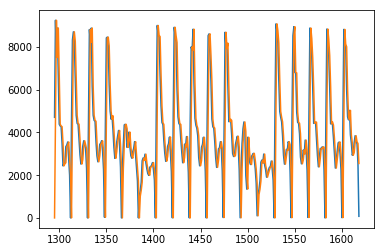

In [158]:
df1

,t1,t2,na1,na2
0,NaN,6,NaN,418
1,6.0,7,418.0,689
2,7.0,8,689.0,926
3,8.0,9,926.0,1283
4,9.0,10,1283.0,1903
5,10.0,11,1903.0,2470
6,11.0,12,2470.0,2193
7,12.0,13,2193.0,2228
8,13.0,14,2228.0,2215
9,14.0,15,2215.0,1982


In [141]:

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

def model_persistence(x):
	return x

predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

,time,na_entry,time,na_entry
0,NaN,NaN,6,418
1,6.0,418.0,7,689
2,7.0,689.0,8,926
3,8.0,926.0,9,1283
4,9.0,1283.0,10,1903
5,10.0,1903.0,11,2470
6,11.0,2470.0,12,2193
7,12.0,2193.0,13,2228
8,13.0,2228.0,14,2215
9,14.0,2215.0,15,1982


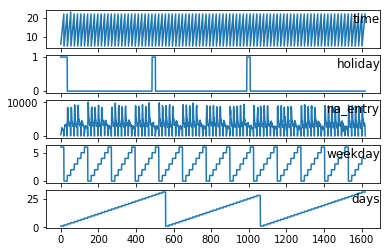

In [16]:
#todo include errors

groups = [1, 2, 3, -1, -2]
i = 1
# plot each column
values = dataset.values
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [17]:
#variables will be (day, hour, holiday, weekdays)

from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [126]:
dataset=pd.read_csv("dataset-1.csv")
data_1=dataset[["na_entry", "time", "weekday", "holiday", "days"]]

In [127]:
data_naive = dataset[["na_entry", "time", "date"]]

In [128]:
data_naive["time"] = pd.to_datetime(data_naive["time"], unit="h")


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [115]:
data_naive["new_date"]=data_naive['date'].dt.time

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
yo=series_to_supervised(data_1.values, n_in=5, n_out=1, dropnan=True)

In [35]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [38]:
# ensure all data is float
values = data_1.values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [43]:
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)

In [84]:
values = reframed.values
n_train_hours = 1500
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1500, 1, 5) (1500,) (119, 1, 5) (119,)


Train on 1500 samples, validate on 119 samples
Epoch 1/500
 - 1s - loss: 0.1681 - val_loss: 0.1195
Epoch 2/500
 - 0s - loss: 0.0920 - val_loss: 0.0847
Epoch 3/500
 - 0s - loss: 0.0823 - val_loss: 0.0839
Epoch 4/500
 - 0s - loss: 0.0818 - val_loss: 0.0833
Epoch 5/500
 - 0s - loss: 0.0807 - val_loss: 0.0828
Epoch 6/500
 - 0s - loss: 0.0807 - val_loss: 0.0823
Epoch 7/500
 - 0s - loss: 0.0797 - val_loss: 0.0821
Epoch 8/500
 - 0s - loss: 0.0794 - val_loss: 0.0815
Epoch 9/500
 - 0s - loss: 0.0787 - val_loss: 0.0810
Epoch 10/500
 - 0s - loss: 0.0782 - val_loss: 0.0807
Epoch 11/500
 - 0s - loss: 0.0778 - val_loss: 0.0802
Epoch 12/500
 - 0s - loss: 0.0775 - val_loss: 0.0801
Epoch 13/500
 - 0s - loss: 0.0768 - val_loss: 0.0796
Epoch 14/500
 - 0s - loss: 0.0762 - val_loss: 0.0788
Epoch 15/500
 - 0s - loss: 0.0758 - val_loss: 0.0779
Epoch 16/500
 - 0s - loss: 0.0753 - val_loss: 0.0778
Epoch 17/500
 - 0s - loss: 0.0748 - val_loss: 0.0769
Epoch 18/500
 - 0s - loss: 0.0740 - val_loss: 0.0769
Epoch 19

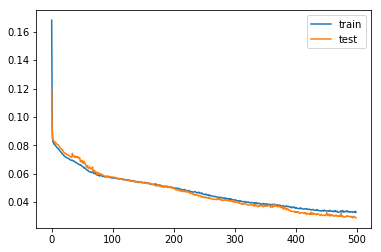

In [85]:
# design network
model = Sequential()
model.add(LSTM(40, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [86]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 466.059


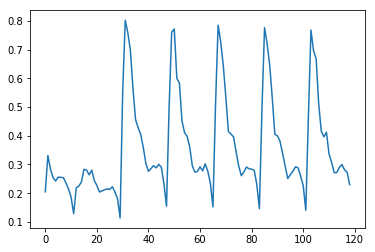

In [74]:
pyplot.plot(yhat)
pyplot.show()

In [87]:
g=model.predict(test_X[:10])

ValueError: Error when checking : expected lstm_7_input to have 3 dimensions, but got array with shape (10, 5)

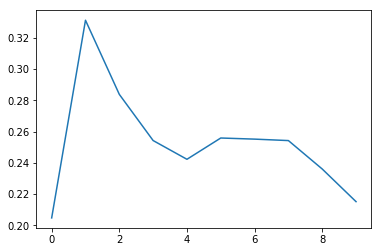

In [71]:
pyplot.plot(g)
pyplot.show()

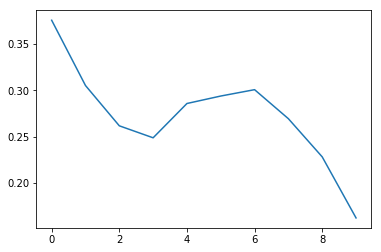

In [70]:
pyplot.plot(test_y[:10])
pyplot.show()